Before running this notebook, run this command in your terminal `pip install pylandtemp` or simply copy and paste this `!pip install pylandtemp` into a cell and run

# 1.  Import python dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio.plot
import rasterio

# 2. Location

For this tutorial, we’ll use the NIR and Red bands from a Landsat-8 scene above part of the central valley and the Sierra Nevada in California. We’ll be using Level 1TP datasets, orthorectified, map-projected images containing radiometrically calibrated data.

# 3. Bands needed from land surface temperature computation using single window.

- Red: Band 4
- Near-Infrared (NIR): Band 5
- Thermal infrared 1: Band 10

Here, I have used `rasterio` package to load the images/bands needed.

In [2]:
url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/'
redband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(4) # L1TP_216074_20160531_20180528_01_T1_B4.TIF'
nirband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(5)
tempband10 = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(10)

In [3]:
with rasterio.open(url+redband) as src:
    redImage = src.read(1).astype('f4')

with rasterio.open(url+nirband) as src:
    nirImage = src.read(1).astype('f4')
    
with rasterio.open(url+tempband10) as src:
    tempImage10 = src.read(1).astype('f4')

# 8. Compute land surface temperature

In [5]:
from pylandtemp import single_window

### Single window

In [6]:
lst_image_single_window = single_window(tempImage10, redImage, nirImage, unit='celcius')

##### Visualize the  Land Surface Temperature obtained

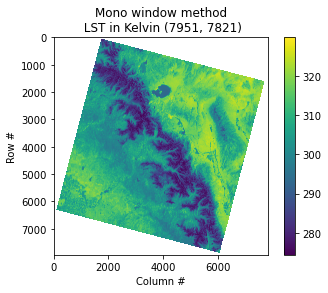

In [7]:
plt.imshow(lst_image_single_window)
plt.colorbar()
plt.title('{}\n LST in Kelvin {}'.format(f'Mono window method', lst_image_single_window.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()